<a href="https://colab.research.google.com/github/ppoelman-groeipunt/public-projects/blob/main/visualize_world_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project - Visualize World Data

### Setup notebook

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
print("Setup Complete!")

Setup Complete!


### Load the dataset

In [2]:
# Read a CSV file into a pandas DataFrame
url = "https://raw.githubusercontent.com/ppoelman-groeipunt/datasets/main/gapminder.csv"
world_df = pd.read_csv(url, index_col='country')
world_df

,year,population,cont,life_exp,gdp_cap
country,,,,,
Afghanistan,2007,31889923,Asia,43.828,974.580338
Albania,2007,3600523,Europe,76.423,5937.029526
Algeria,2007,33333216,Africa,72.301,6223.367465
Angola,2007,12420476,Africa,42.731,4797.231267
Argentina,2007,40301927,Americas,75.320,12779.379640
...,...,...,...,...,...
Vietnam,2007,85262356,Asia,74.249,2441.576404
West Bank and Gaza,2007,4018332,Asia,73.422,3025.349798
"""Yemen, Rep.""",2007,22211743,Asia,62.698,2280.769906


### Explore the dataset

In [3]:
# Display information
world_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        142 non-null    int64  
 1   population  142 non-null    int64  
 2   cont        142 non-null    object 
 3   life_exp    142 non-null    float64
 4   gdp_cap     142 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 6.7+ KB


In [4]:
# Display first n rows
world_df.head(3)

,year,population,cont,life_exp,gdp_cap
country,,,,,
Afghanistan,2007,31889923,Asia,43.828,974.580338
Albania,2007,3600523,Europe,76.423,5937.029526
Algeria,2007,33333216,Africa,72.301,6223.367465


In [5]:
# Display statistics by column
world_df.describe()
world_df['population'].describe()

count    1.420000e+02
mean     4.402122e+07
std      1.476214e+08
min      1.995790e+05
25%      4.508034e+06
50%      1.051753e+07
75%      3.121004e+07
max      1.318683e+09
Name: population, dtype: float64

### Query the dataset

In [6]:
# Select rows by index
world_df.loc[['Belgium', 'Netherlands']]

,year,population,cont,life_exp,gdp_cap
country,,,,,
Belgium,2007,10392226,Europe,79.441,33692.60508
Netherlands,2007,16570613,Europe,79.762,36797.93332


In [7]:
# Select and order top n rows
world_largest = world_df.nlargest(5, 'population')
world_largest

,year,population,cont,life_exp,gdp_cap
country,,,,,
China,2007,1318683096,Asia,72.961,4959.114854
India,2007,1110396331,Asia,64.698,2452.210407
United States,2007,301139947,Americas,78.242,42951.653090
Indonesia,2007,223547000,Asia,70.650,3540.651564
Brazil,2007,190010647,Americas,72.390,9065.800825



### Expand the dataset

In [8]:
# Calculate population in millions
world_df['pop_mil'] = world_df['population'] / 1000000

# Map colors by continent
mapping = {
    'Asia': 'red',
    'Europe': 'green',
    'Africa': 'blue',
    'Americas': 'yellow',
    'Oceania': 'black'
}
world_df['color'] = world_df['cont'].replace(mapping)

world_df.head(3)

,year,population,cont,life_exp,gdp_cap,pop_mil,color
country,,,,,,,
Afghanistan,2007,31889923,Asia,43.828,974.580338,31.889923,red
Albania,2007,3600523,Europe,76.423,5937.029526,3.600523,green
Algeria,2007,33333216,Africa,72.301,6223.367465,33.333216,blue


### Visualize the dataset

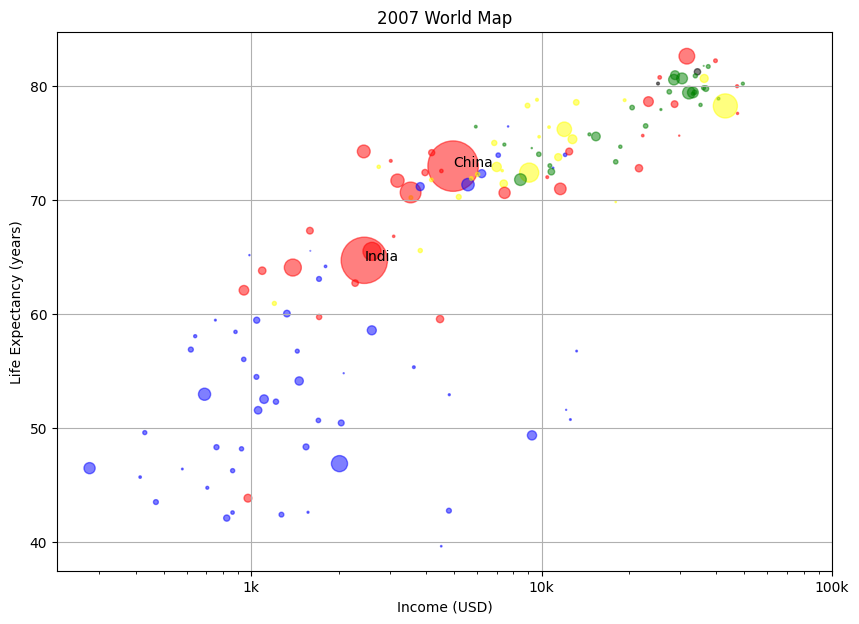

In [9]:
plt.figure(figsize=(10, 7))

# 1. Create a basic scatter plot
x_values = world_df['gdp_cap']
y_values = world_df['life_exp']
# plt.scatter(x_values, y_values)

# 2. Size the bubbles
s_values = world_df['pop_mil']
# plt.scatter(x_values, y_values, s=s_values)

# 3. Color the bubbles
c_values = world_df['color']
plt.scatter(x_values, y_values, s=s_values, c=c_values, alpha=0.5)

# Customize the plot
plt.xscale('log')
plt.xlabel('Income (USD)')
plt.ylabel('Life Expectancy (years)')
plt.title('2007 World Map')
plt.xticks([1000, 10000, 100000], ['1k', '10k', '100k'])
plt.text(2452, 64.7, 'India')
plt.text(4960, 72.9, 'China')
plt.grid(True)

# Display the plot
plt.show()